# Decision trees and Random Forests

1. Belongs to supervised learning algorithms
2. Can be used for both regression and classification
3. Attribution selection methods:
    Information gain & Gini index
4. Overfitting is a practical problem in decision trees.
    Prepruning 
    Postpruning
    

In [1]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

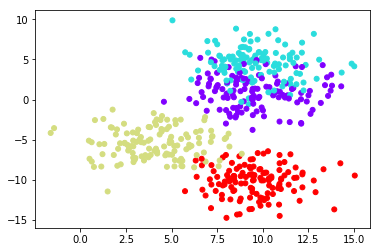

In [2]:
X,y = make_blobs(n_samples=500, centers=4, random_state=4, cluster_std=2.0)
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)
plt.scatter(X[:,0],X[:,1],c=y,s=25,cmap="rainbow")
plt.show()

In [3]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
ypred = clf.predict(Xtest)
metrics.accuracy_score(ypred,ytest)

0.85599999999999998

In [5]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(n_estimators=100, max_samples=0.8,random_state=1)
bag.fit(Xtrain,ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.8,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [6]:
ypred2 = bag.predict(Xtest)
metrics.accuracy_score(ypred2,ytest)

0.92800000000000005

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=1)
model.fit(Xtrain,ytrain)
ypred3 = model.predict(Xtest)
metrics.accuracy_score(ypred3,ytest)

0.91200000000000003

### Random Forest Regression

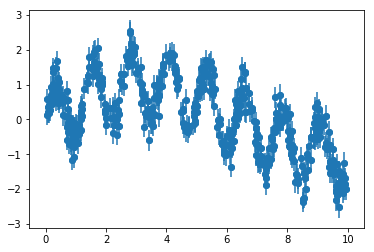

In [8]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(500)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')
plt.scatter(x,y)
plt.show()

In [9]:
x.shape
X= x.reshape(x.shape[0],-1)
X.shape

(500, 1)

In [10]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
Xtrain,Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(200)
forest.fit(Xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
ypred = forest.predict(Xtest)

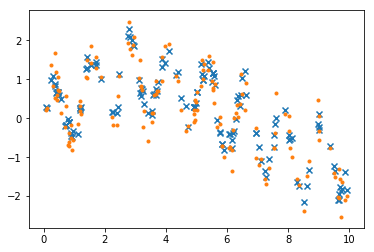

0.12023545190876088

In [12]:
#plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.scatter(Xtest,ypred,marker='x')
plt.scatter(Xtest,ytest,marker='.',alpha=1)
plt.show()
metrics.mean_squared_error(ypred,ytest)

### Classification of MNIST digits

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
digits = load_digits()
digits.keys()
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1)

In [14]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

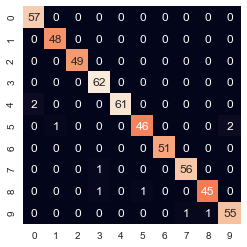

In [15]:
metrics.accuracy_score(ypred,ytest)
confmat = confusion_matrix(ypred,ytest)
sns.heatmap(confmat,square=True, annot=True,cbar=False)
plt.show()

In [38]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.utils import shuffle
mnist = fetch_mldata("MNIST Original")

In [32]:
digits = load_digits()
X = digits.data
y = digits.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
knn = KNeighborsClassifier(n_neighbors=100)
paramgrid = dict(n_neighbors =[5,10,25,50,100,250,500])
grid = GridSearchCV(knn,paramgrid,cv=3,scoring='accuracy')

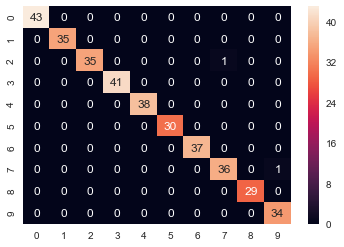

In [62]:
grid.fit(Xtrain,ytrain)
grid.best_params_
ypred = grid.predict(Xtest)
conmat = metrics.confusion_matrix(ytest,ypred)
sns.heatmap(conmat,annot=True)
plt.show()

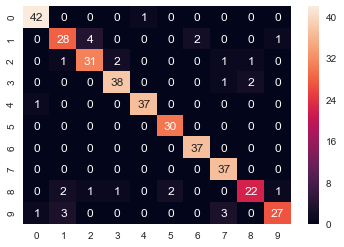

In [63]:
knn.fit(Xtrain,ytrain)
ypredk = knn.predict(Xtest)
conmatk = metrics.confusion_matrix(ytest,ypredk)
sns.heatmap(conmatk,annot=True)
plt.show()